In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/YBIFoundation/Dataset/main/IRIS.csv")
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
print(df.shape)
df['species'].unique()

(150, 5)


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
x = df.iloc[:, 0:4]
y = df.iloc[:, 4:]

In [ ]:
encode = LabelEncoder()
y = encode.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
y_pred = naive_bayes.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')

In [ ]:
matrix = confusion_matrix(y_test, y_pred, labels = naive_bayes.classes_)
print(matrix)

tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1, 0]).reshape(-1)

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


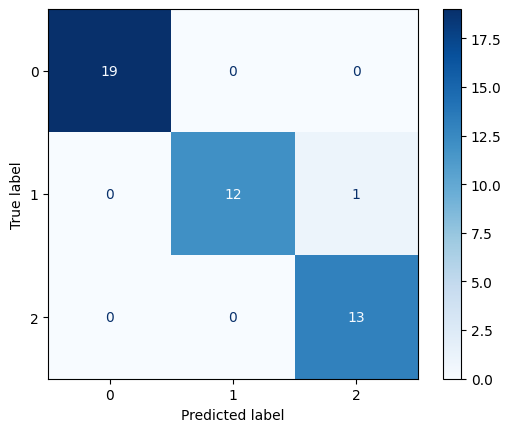

In [ ]:
cm = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=naive_bayes.classes_)
cm.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Error Rate: ", (fp+fn)/(tp+tn+fp+fn))
print("Recall: ", tp/(tp+fn))
print("Specifity: ", tn/(fp+tn))
print("Prediction: ", tp/(tp+fp))
print("False Positive Rate: ", fp/(tn+fp))

Accuracy:  0.9777777777777777
Error Rate:  0.0
Recall:  1.0
Specifity:  1.0
Prediction:  1.0
False Positive Rate:  0.0
